In [1]:
import pandas as pd
import numpy as np

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv('D:\\Flip Robo Internship\\New INTERNSHIP\\Project Evaluation Phase\\Second Pahse Projects\\Loan prediction\\loan_prediction_dataset.csv')
test  = pd.read_csv('D:\\Flip Robo Internship\\New INTERNSHIP\\Project Evaluation Phase\\Second Pahse Projects\\Loan prediction\\loan_prediction_dataset.csv')

#### Data Insights

In [8]:
train.columns #all columns in dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
train.sample(5)  #to display any 5 random rows from dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
325,LP002067,Male,Yes,1,Graduate,Yes,8666,4983.0,376.0,360.0,0.0,Rural,N
341,LP002116,Female,No,0,Graduate,No,2378,0.0,46.0,360.0,1.0,Rural,N
394,LP002266,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban,Y
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
229,LP001761,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,1.0,Rural,Y


In [10]:
train.info() #to get type of each feature object means that it is categorical data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
print(train.shape)
print(test.shape)

(614, 13)
(614, 13)


## Data Visualisation

Target Variable: It is the dependent variable which is "Loan Status".

<AxesSubplot:>

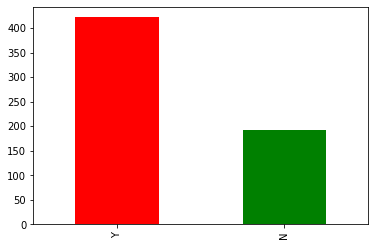

In [12]:
train["Loan_Status"].value_counts().plot.bar(color=["red","green"])
#we will plot count of loan approved and not approved by bank

In [13]:
(train["Loan_Status"]=="Y").value_counts()
#about 422 loans are approved by bank
#and 192 loans are rejected 

True     422
False    192
Name: Loan_Status, dtype: int64

### Independent Variable (Categorical)

To determine how the categorical variable is involved in loan taking

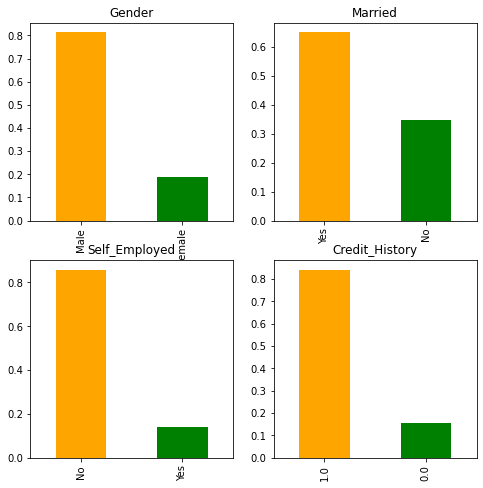

In [14]:
plt.figure(1)
plt.subplot(221)
train["Gender"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Gender",color=["orange","green"])
plt.subplot(222)
train["Married"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Married",color=["orange","green"])
plt.subplot(223)
train["Self_Employed"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Self_Employed",color=["orange","green"])
plt.subplot(224)
train["Credit_History"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Credit_History",color=["orange","green"])
plt.show()

STATUS:

- Male applying for loan are more than Female.About 80% .
- Almost 400 individual applaying for loan are marrried about 65% .
- Self Employed individual take more loan .About 85% .
- Around 85% applicants have repaid their debts.

#### Independent Variable (Ordinal)

<AxesSubplot:title={'center':'Property_Area'}>

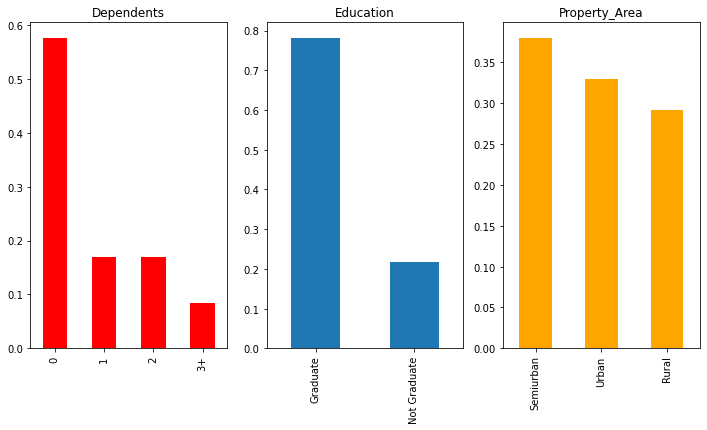

In [17]:
plt.figure(1)
plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(12,6),color="red",title="Dependents")
plt.subplot(132)
train["Education"].value_counts(normalize=True).plot.bar(figsize=(12,6),title="Education")
plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(12,6),color="orange",title="Property_Area")

#DependentsEducation

- Most appliers have no dependencies.
- Graduate People apply more for loan than Undergraduate.About 80%.
- About 40% loan are from Semiurban area

#### Independent Variable (Numerical)

C:\Users\akank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


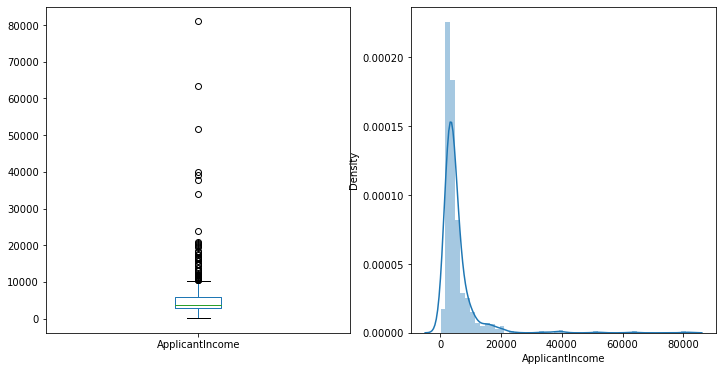

In [18]:
import seaborn as sns
plt.figure(1)
plt.subplot(121)
train["ApplicantIncome"].plot.box(figsize=(12,6))
plt.subplot(122)
sns.distplot(train["ApplicantIncome"])
plt.show()

People who applying for loan, Income's is not a normal distribution. From box plot, a lot of extreme values can be seen, need to normalise it.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

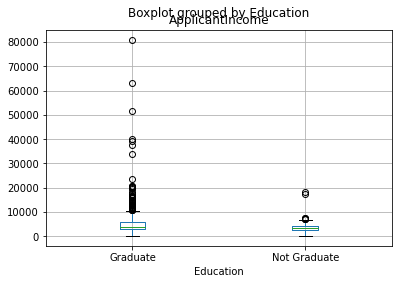

In [19]:
train.boxplot(column='ApplicantIncome', by = 'Education')
# we observe that outliners in apllicant income is because of graduate person with high income.

C:\Users\akank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


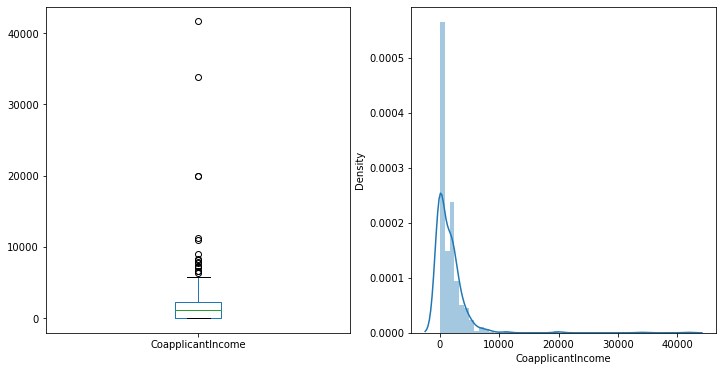

In [20]:
plt.figure(1)
plt.subplot(121)
train["CoapplicantIncome"].plot.box(figsize=(12,6))
plt.subplot(122)
sns.distplot(train["CoapplicantIncome"])
plt.show()
#Not a normal distribution

C:\Users\akank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


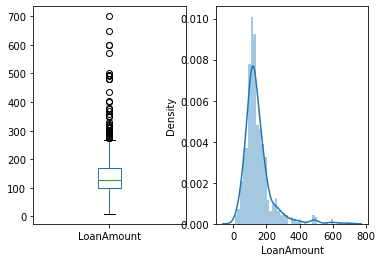

In [21]:

plt.figure(1)
plt.subplot(121)
train["LoanAmount"].plot.box()
plt.subplot(122)
sns.distplot(train["LoanAmount"])
plt.show()
#it's also not a normal distrubution 

#### Bivariate Analysis

<AxesSubplot:xlabel='Gender'>

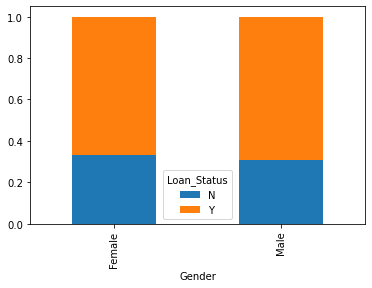

In [22]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Married'>

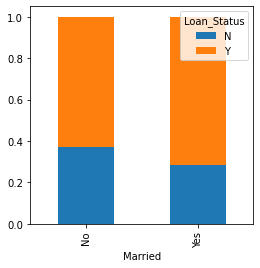

In [23]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

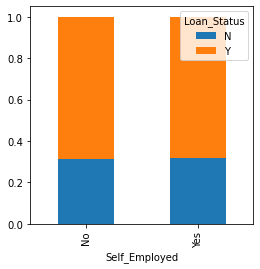

In [24]:
Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Employed.div(Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


<AxesSubplot:xlabel='Dependents'>

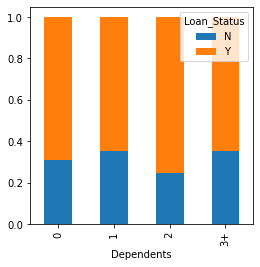

In [25]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

STATUS:

- Both gender have equal probability of loan approval.
- Married loan are more approved than non - married.
- Any kind of dependencies approval is same.
- Self employed is same.

<AxesSubplot:xlabel='Property_Area'>

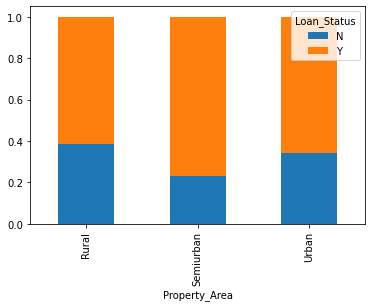

In [26]:
property_a = pd.crosstab(train["Property_Area"],train["Loan_Status"])
property_a.div(property_a.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='Credit_History'>

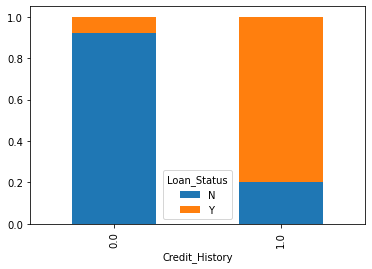

In [27]:
#Credit_History
credit_hist = pd.crosstab(train["Credit_History"],train["Loan_Status"])
credit_hist.div(credit_hist.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True")

- Semiurban area loan are more approved .
- It looks people with credit history as 1 are more likely to get their loans approved.

As the target variable is 'Y' and 'N', there is need to convert it to 1,0 .So,that algorithm can be applied. Similarly the Dependents contain 3+, replace it with 3.

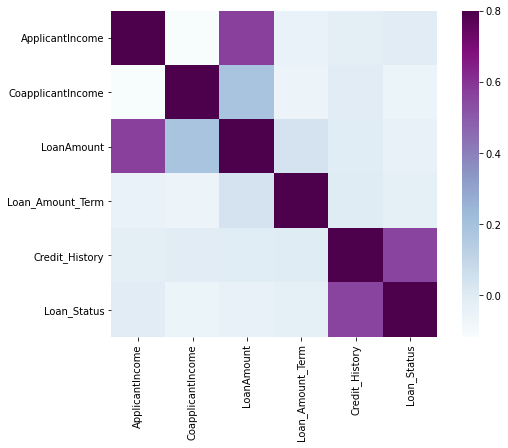

In [28]:
#encoding columns
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

 #plot corelation matrix
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

Aplication income and loan amount are corelated also credit_history and loan_status are corelated.

#### Data Cleaning

In [29]:
is_na = train.isna().sum()
is_na

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As gender ,married ,Dependents,self_employed,Credit_history are Categorical, replace missing with mode .The value which occur more or has high frequency.

In [30]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
print(train.shape)

(614, 13)


Now,numerical data LoanAmout as are not normaly distributed, replace NA with median.

In [33]:

#normalise the outlier it gives normalsied distribution
train["LoanAmount"] = np.log(train['LoanAmount'])
test["LoanAmount"] = np.log(test['LoanAmount'])

#### Model Building

In [34]:
train.head(2)
from sklearn import preprocessing

In [35]:
#drop Loan_ID
train = train.drop("Loan_ID",axis=1)
test = test.drop("Loan_ID",axis=1)
print(train.shape)

(614, 12)


In [36]:
#seprate target colmn
X = train.iloc[:,:-1]
Y = train.iloc[:,-1]
print(X.shape)
print(Y.shape)
print(X.columns)

(614, 11)
(614,)
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [37]:
X =pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [38]:
train.shape

(614, 21)

#### Logistic Regression

In [39]:
#train model on train set and make prediction on cross veidation set
#so spliting train set into train and cross velidation set


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#split train & cv
x_train,x_cv,y_train,y_cv = train_test_split(X,Y,test_size = 0.3) 

#model initialisation & fit

model = LogisticRegression()
model.fit(x_train,y_train)

#preict
predict_y = model.predict(x_cv)

#accuracy
acc = accuracy_score(y_cv,predict_y)

print("accuracy on cv",acc*100,'%')

#for test set, perform all operations on test set also 
#than predict 

accuracy on cv 78.37837837837837 %


##### Logistic Regression using stratified k-folds cross validation

In [41]:
from sklearn.model_selection import StratifiedKFold


In [42]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
acc=0
for train_index,test_index in kf.split(X,Y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=Y.loc[train_index],Y.loc[test_index]
    model = LogisticRegression(max_iter=150,random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    acc = acc+score
    print('accuracy_score',score)
    i+=1 
    
print("Mean accu",acc/5 *100,'%')


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.8114754098360656
Mean accu 81.43276022924164 %
